In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import label_binarize

In [8]:
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True, fmt='d',cmap='Blues', xticklabels=classes,yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta predicha')
    plt.show()
#Tasa de falsos positivo es fpr, Tasa de Verdadeos positivos es tpr
def plot_roc_curve(fpr, tpr, roc_auc, title):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1],[0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [9]:
print("Clasificación Binaria: Cancer de Mama")
breast_cancer = datasets.load_breast_cancer()
X_cancer, y_cancer = breast_cancer.data,breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled,y_train)
y_pred = clf.predict(X_test_scaled)

Clasificación Binaria: Cancer de Mama



Clasification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        63
      benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



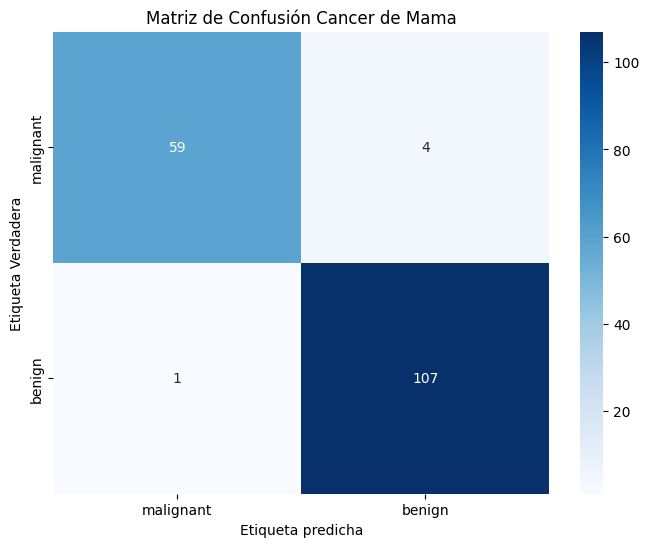

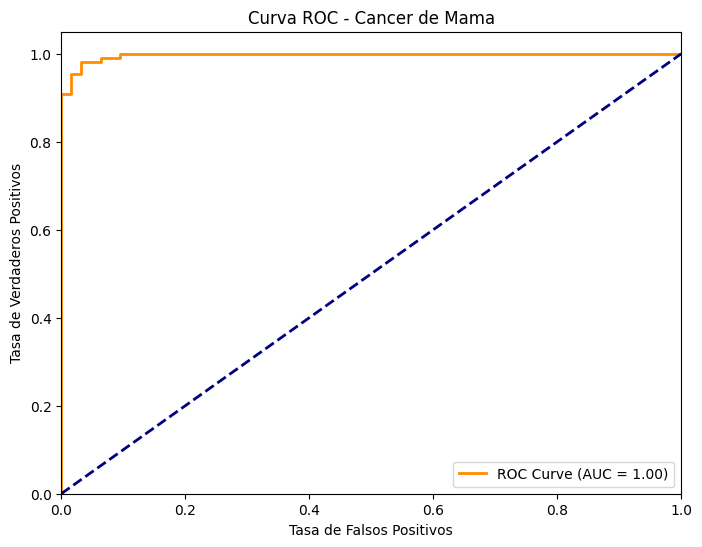

In [10]:
# Lo primero siempre el Clasification Report
print("\nClasification Report:")
print(classification_report(y_test,y_pred, target_names=breast_cancer.target_names))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, breast_cancer.target_names, "Matriz de Confusión Cancer de Mama")

y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr, roc_auc, "Curva ROC - Cancer de Mama")


In [11]:
# Clasificacion multiclase iris
print("\nClasificación Multiclase Iris")
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X_iris,y_iris, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)


Clasificación Multiclase Iris



Clasification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



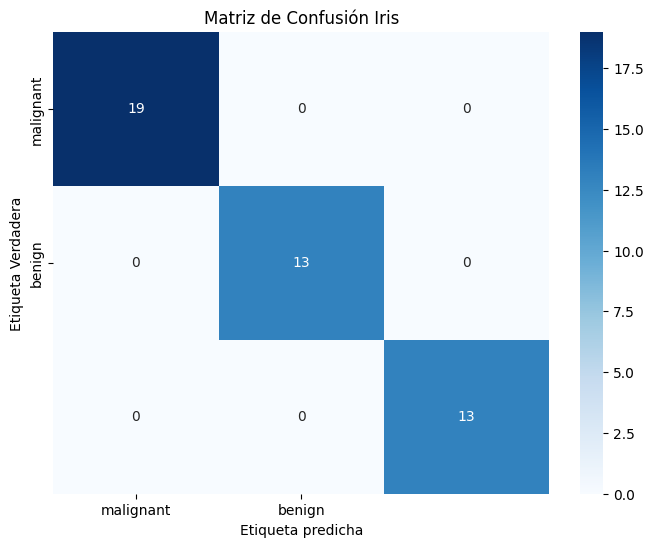

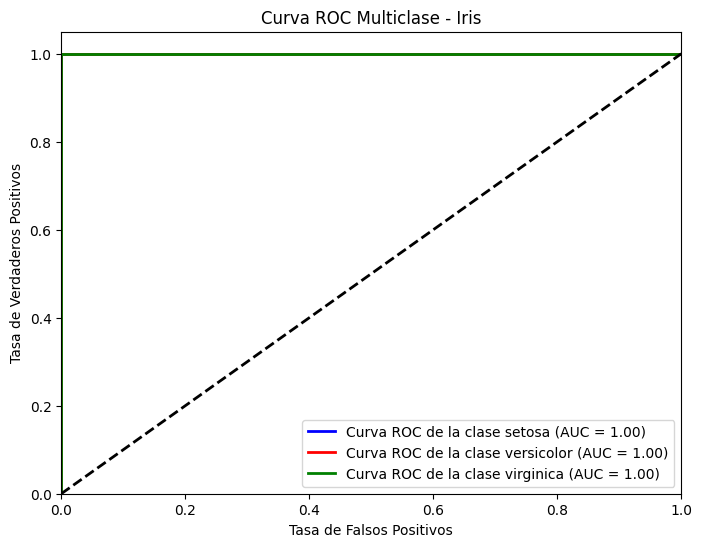

In [19]:
# Primero, mostramos un reporte con varias métricas sobre la clasificación
print("\nClasification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Creamos la matriz de confusión, que nos dice cuántos aciertos y errores tuvimos
cm = confusion_matrix(y_test, y_pred)

# Esta función dibuja la matriz de confusión para que sea más fácil de ver
plot_confusion_matrix(cm, breast_cancer.target_names, "Matriz de Confusión Iris")

# Ahora vamos a ver cómo de bien funciona nuestro modelo usando la curva ROC para las tres clases
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Convierte las etiquetas a formato binario
y_score = clf.predict_proba(X_test_scaled)  # Predice las probabilidades para cada clase

# Preparamos diccionarios para guardar los resultados de cada clase
fpr = dict()  # Falsos positivos
tpr = dict()  # Verdaderos positivos
roc_auc = dict()  # Área bajo la curva (AUC)
n_classes = 3  # Número de clases

# Para cada clase, calculamos los valores para la curva ROC
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])  # Calcula la curva ROC
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calcula el área bajo la curva (AUC)

# Dibujamos la curva ROC para cada clase
plt.figure(figsize=(8, 6))  # Establece el tamaño de la gráfica
colors = ['blue', 'red', 'green']  # Colores para cada clase

# Dibujamos cada una de las curvas ROC para cada clase
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Curva ROC de la clase {iris.target_names[i]} (AUC = {roc_auc[i]:.2f})')

# Dibujamos una línea diagonal para ver cómo se compara nuestro modelo con una predicción aleatoria
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea punteada en negro

# Configuramos el gráfico
plt.xlim([0.0, 1.0])  # Limite en el eje X
plt.ylim([0.0, 1.05])  # Limite en el eje Y
plt.xlabel('Tasa de Falsos Positivos')  # Etiqueta del eje X
plt.ylabel('Tasa de Verdaderos Positivos')  # Etiqueta del eje Y
plt.title('Curva ROC Multiclase - Iris')  # Título del gráfico
plt.legend(loc="lower right")  # Posición de la leyenda
plt.show()  # Mostrar el gráfico
